In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

### 전처리

In [8]:
# 컬럼 출력

df_train.columns
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
# 데이터 타입 출력
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
# 파일 전체 관련

# df_train.describe()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Numerical Values

In [3]:
# Pclass

df_train['Pclass'].value_counts().sort_index(ascending=False)

Pclass
3    491
2    184
1    216
Name: count, dtype: int64

In [4]:
# Age

import numpy as np

## NaN이란?

# df_train[df_train['Age'].isnull()]
# df_train[df_train['Age'].isna()]

# df_train['Age'].isnull().sum() / len(df_train['Age']) * 100

# NaN값 처리 방법
# df_train.dropna(subset=['Age'])
# fillna - 특정 값
# df_train.fillna(0)
# fillna - 평균 값
# df_train['Age'].fillna(df_train['Age'].mean()).head(10)
# fillna - 다른 컬럼의 값
# df_train['Age'].fillna(df_train['PassengerId'])
# ffill // bfill
# df_train['Age'].fillna(method='ffill', limit=1).head(10)
# df_train['Age'].fillna(method='bfill', limit=1).head(10)

In [5]:
# SibSp - # of siblings / spouses

df_train['SibSp'].value_counts().sort_index(ascending=False)

SibSp
8      7
5      5
4     18
3     16
2     28
1    209
0    608
Name: count, dtype: int64

In [6]:
# Parch - # of parents / children

df_train['Parch'].value_counts().sort_values(ascending=False)

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [7]:
df_train['FamNum'] = df_train['SibSp'] + df_train['Parch']

In [8]:
# Fare

df_train['Fare']

# 숙제
# 1. Count를 even하게 10개의 그룹으로 나눠서 (891개니까 roughly 90) - Fare_group_1에 저장
# 2. 값을 기준으로 5개의 그룹으로 나눠서 Fare_group_2에 저장 (0 ~ 10 / 10 ~ 20 / 20 ~ 30 / 30 ~ 40 / 40~)
# df_train['Fare']

df_train['Fare_group_1'] = pd.qcut(df_train['Fare'], q=[i / 10 for i in range(0, 11)], labels=[i for i in range(0, 10)])

df_train['Fare_group_2'] = pd.cut(df_train['Fare'], bins=[0, 10, 20, 30, 40, max(df_train['Fare'])], labels=[i for i in range(0, 5)])
# pd.cut(df_train['Fare'], bins=[0, 10, 20, 30, 40, 10000], labels=[i for i in range(0, 5)])

In [9]:
# 왜 판다스 내부의 함수를 써야하는가 (for vs. 내부함수)

import numpy as np
import time

start_time = time.time()

df_train['Fare_Existing'] = 0

for i in range(len(df_train)):
    if df_train.loc[i, 'Fare_Existing'] == np.NaN:
        df_train.loc[i, 'Fare_Existing'] = 0
    else:
        df_train.loc[i, 'Fare_Existing'] = 1

end_time = time.time()

print("For Loop: {}".format(end_time - start_time))


start_time = time.time()

df_train['Fare_Existing'] = df_train['Fare'].apply(lambda x: 0 if x == np.NaN else 1)

end_time = time.time()

print("For Loop: {}".format(end_time - start_time))


For Loop: 0.6629016399383545
For Loop: 0.002002716064453125


### Categorial Values

In [10]:
### name
# df_train[df_train['Name'].str.contains(r'Mrs. ')]

pd.get_dummies(df_train['Name'])

,"Abbing, Mr. Anthony","Abbott, Mr. Rossmore Edward","Abbott, Mrs. Stanton (Rosa Hunt)","Abelson, Mr. Samuel","Abelson, Mrs. Samuel (Hannah Wizosky)","Adahl, Mr. Mauritz Nils Martin","Adams, Mr. John","Ahlin, Mrs. Johan (Johanna Persdotter Larsson)","Aks, Mrs. Sam (Leah Rosen)","Albimona, Mr. Nassef Cassem",...,"Yrois, Miss. Henriette (""Mrs Harbeck"")","Zabour, Miss. Hileni","Zabour, Miss. Thamine","Zimmerman, Mr. Leo","de Messemaeker, Mrs. Guillaume Joseph (Emma)","de Mulder, Mr. Theodore","de Pelsmaeker, Mr. Alfons","del Carlo, Mr. Sebastiano","van Billiard, Mr. Austin Blyler","van Melkebeke, Mr. Philemon"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
### Sex

# df_train['Sex']
df_train['Sex'].value_counts()

### One-Hot Encoding

# Method #1
pd.get_dummies(df_train['Sex'])

# Method #2
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df_train[['Sex']])
pd.DataFrame(encoded, columns=encoder.get_feature_names_out())

,Sex_female,Sex_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,1.0,0.0
888,1.0,0.0
889,0.0,1.0


In [12]:
# Ticket

# df_train['Ticket']

In [13]:
# Cabin

# df_train['Cabin']
cabin_only = df_train[["Cabin"]].copy()
# Null 값 제외
cabin_only["Cabin_Data"] = cabin_only["Cabin"].isnull().apply(lambda x: not x)
# Deck 값 추출 (앞에 알파벳)
# cabin_only["Deck"] = cabin_only["Cabin"].str.slice(0,1)
cabin_only["Deck"] = cabin_only["Cabin"].str[:1]
# 방 번호 // Regular Expression
cabin_only["Room"] = cabin_only["Cabin"].str.slice(1,5).str.extract("([0-9]+)", expand=False).astype("float")

cabin_only[cabin_only["Cabin_Data"]]

,Cabin,Cabin_Data,Deck,Room
1,C85,True,C,85.0
3,C123,True,C,123.0
6,E46,True,E,46.0
10,G6,True,G,6.0
11,C103,True,C,103.0
...,...,...,...,...
871,D35,True,D,35.0
872,B51 B53 B55,True,B,51.0
879,C50,True,C,50.0
887,B42,True,B,42.0


In [14]:
# Embarked

df_train['Embarked']
pd.get_dummies(df_train['Embarked'], prefix='Embarked')
# pd.get_dummies(df_train['Embarked'])

,Embarked_C,Embarked_Q,Embarked_S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


### Visualizations / Further Processing

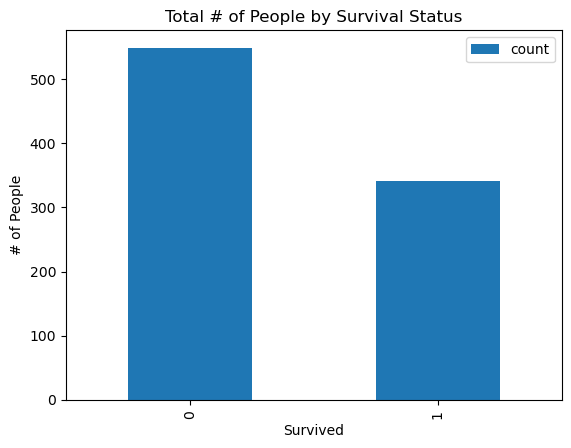

In [15]:
import matplotlib.pyplot as plt

plot = df_train['Survived'].value_counts().plot(kind='bar')
plot.set_xlabel('Survived')
plot.set_ylabel('# of People')
plot.set_title('Total # of People by Survival Status')
plot.legend()

Text(0, 0.5, 'Survival Probability')

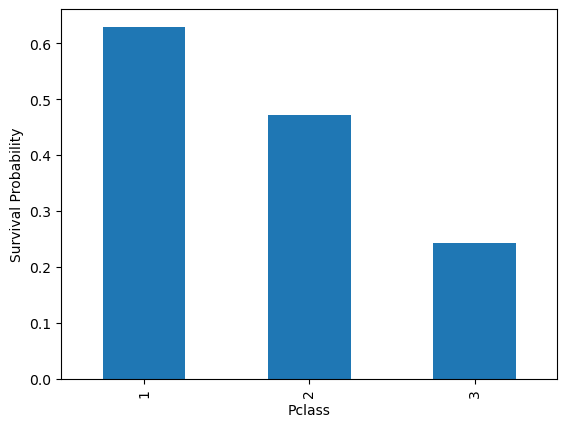

In [16]:
plot = df_train[['Pclass', 'Survived']].groupby('Pclass').mean()['Survived'].plot(kind='bar')
plot.set_xlabel('Pclass')
plot.set_ylabel('Survival Probability')

# df_train[['Pclass', 'Survived']].groupby('Pclass')['Survived'].describe()

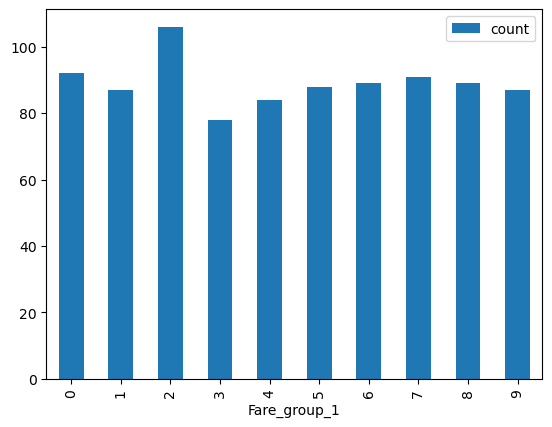

In [17]:
plot = df_train['Fare_group_1'].value_counts().sort_index().plot(kind='bar')
plot.legend()
# df_train['Fare_group_1'].value_counts().sort_index()

<Axes: xlabel='Fare_group_2'>

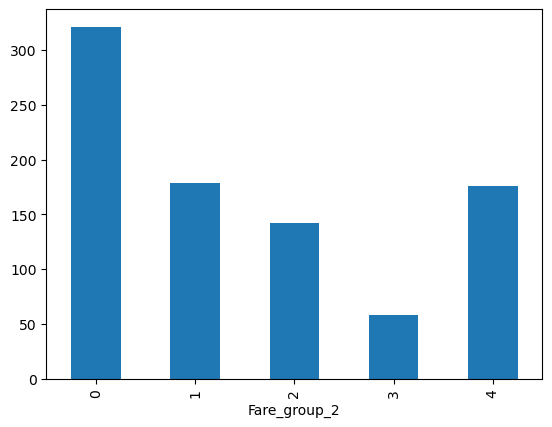

In [18]:
df_train['Fare_group_2'].value_counts().sort_index().plot(kind='bar')

In [19]:
### Correlation

df_train.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamNum,Fare_Existing
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.040143,NaN
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639,NaN
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997,NaN
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914,NaN
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712,NaN
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111,NaN
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138,NaN
FamNum,-0.040143,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000,NaN
Fare_Existing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


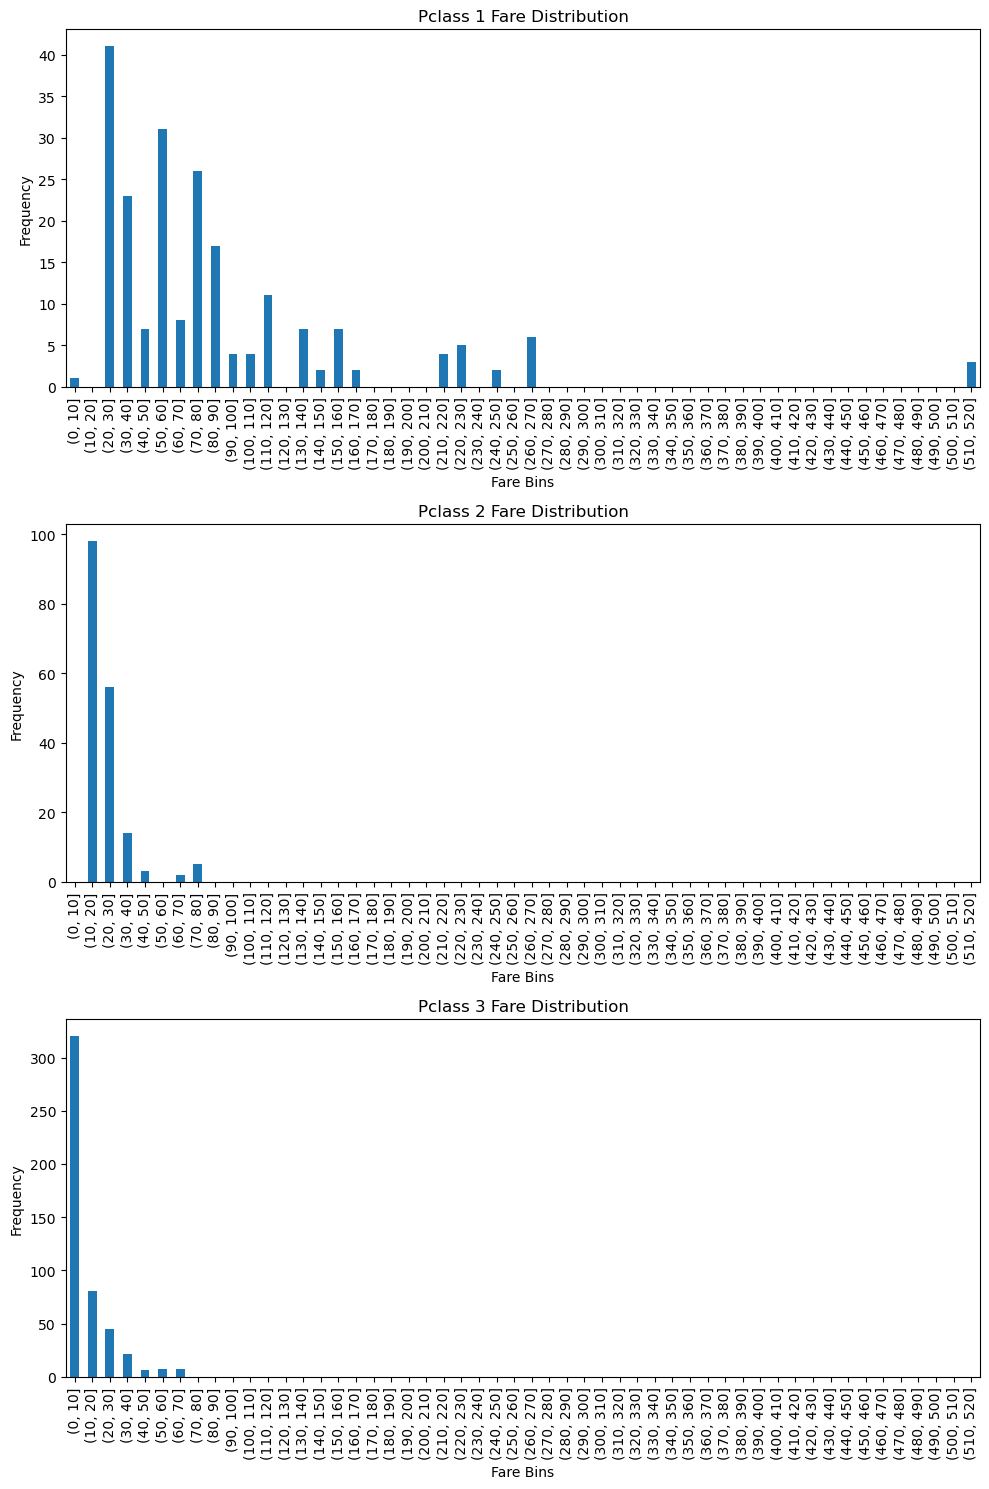

In [20]:
## 숙제

'''
1. Pclass vs. Fare
- 하나의 subplot 마다 Pclass 하나
- Fare은 scale of 10 (10씩 그룹지어서 그래프 생성)

2. Pclass vs. Age
- 하나의 subplot 마다 pclass 하나
- Age - scale of 5
'''
# baseline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Define the bins for the Fare
bins = [i * 10 for i in range(int(max(df_train['Fare'] // 10)) + 2)]

# Plot for Pclass 1
pd.cut(df_train[df_train['Pclass'] == 1]['Fare'], bins=bins).value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_title('Pclass 1 Fare Distribution')
axes[0].set_xlabel('Fare Bins')
axes[0].set_ylabel('Frequency')

# Plot for Pclass 2
pd.cut(df_train[df_train['Pclass'] == 2]['Fare'], bins=bins).value_counts().sort_index().plot(kind='bar', ax=axes[1])
axes[1].set_title('Pclass 2 Fare Distribution')
axes[1].set_xlabel('Fare Bins')
axes[1].set_ylabel('Frequency')

# Plot for Pclass 3
pd.cut(df_train[df_train['Pclass'] == 3]['Fare'], bins=bins).value_counts().sort_index().plot(kind='bar', ax=axes[2])
axes[2].set_title('Pclass 3 Fare Distribution')
axes[2].set_xlabel('Fare Bins')
axes[2].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

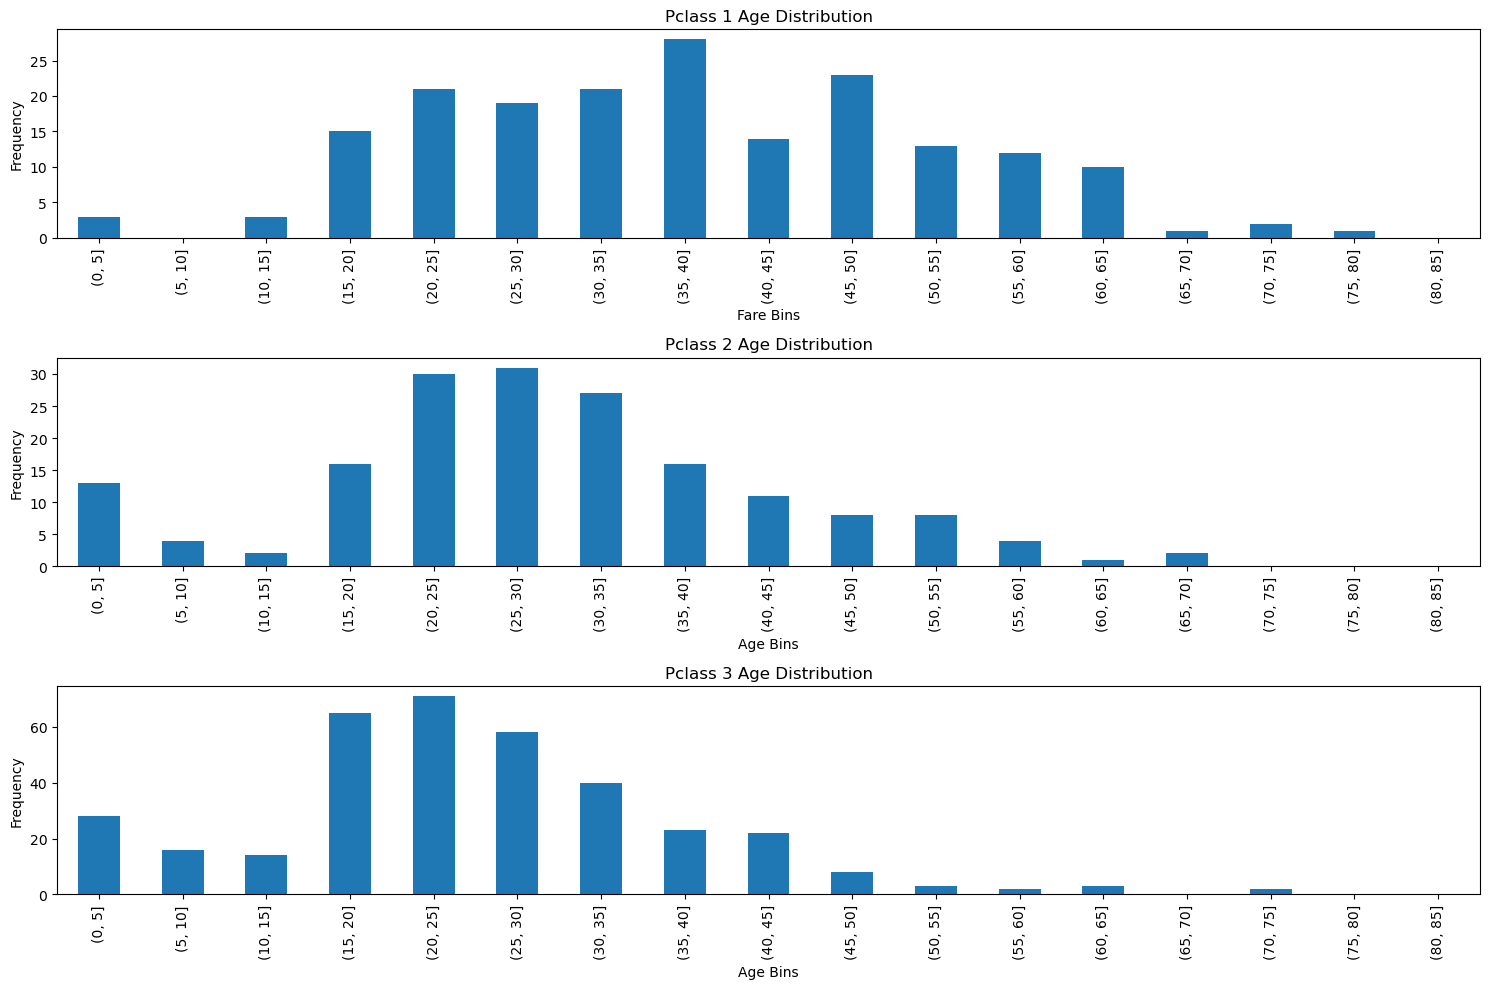

In [21]:
# Age
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

# Define the bins for the Fare
bins = [i * 5 for i in range(int(max(df_train['Age'] // 5)) + 2)]

# Plot for Pclass 1
pd.cut(df_train[df_train['Pclass'] == 1]['Age'], bins=bins).value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_title('Pclass 1 Age Distribution')
axes[0].set_xlabel('Fare Bins')
axes[0].set_ylabel('Frequency')

# Plot for Pclass 2
pd.cut(df_train[df_train['Pclass'] == 2]['Age'], bins=bins).value_counts().sort_index().plot(kind='bar', ax=axes[1])
axes[1].set_title('Pclass 2 Age Distribution')
axes[1].set_xlabel('Age Bins')
axes[1].set_ylabel('Frequency')

# Plot for Pclass 3
pd.cut(df_train[df_train['Pclass'] == 3]['Age'], bins=bins).value_counts().sort_index().plot(kind='bar', ax=axes[2])
axes[2].set_title('Pclass 3 Age Distribution')
axes[2].set_xlabel('Age Bins')
axes[2].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### ML

In [22]:
'''
- Train / Test Dataset 불러오기 // x & y로 나누기

- 같은 transformation 진행
> On Same Scale
> StandardScaler
> MinMaxScaler
'''
## Step 1. Divide features into x and y
x_train, y_train = df_train[['Pclass', 'Age', 'Fare', 'Sex', 'SibSp', 'Parch']].copy(), df_train[['Survived']].copy()
x_test, y_test = df_test[['Pclass', 'Age', 'Fare', 'Sex', 'SibSp', 'Parch']].copy(), pd.read_csv('gender_submission.csv', usecols=['Survived'])

## Columns to use

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# Pclass - Use Apply
x_train['Pclass'] = x_train[['Pclass']].apply(lambda x: (x - 1)  / (max(x) - min(x)))
x_test['Pclass'] = x_test[['Pclass']].apply(lambda x: (x - 1) / (max(x) - min(x)))

# Age - Use Apply
scaler = MinMaxScaler()

x_train['Age'] = x_train['Age'].fillna(x_train['Age'].mean())
x_test['Age'] = x_test['Age'].fillna(x_test['Age'].mean())

x_train['Age'] = scaler.fit_transform(x_train[['Age']])
x_test['Age'] = scaler.fit_transform(x_test[['Age']])

# Sex
encoder = OneHotEncoder(sparse_output=False)
x_train[['Sex_Female', 'Sex_Male']] = encoder.fit_transform(x_train[['Sex']])
x_test[['Sex_Female', 'Sex_Male']] = encoder.fit_transform(x_test[['Sex']])

# Fare
# Make it look like it is normal distribution by taking log
# Then Use StandardScaler
import math
x_train['Fare'] = x_train['Fare'].fillna(0).apply(lambda x: math.log10(x+0.001))
x_test['Fare'] = x_test['Fare'].fillna(0).apply(lambda x: math.log10(x+0.001))

std_scaler = StandardScaler()

x_train['Fare'] = std_scaler.fit_transform(x_train[['Fare']])
x_test['Fare'] = std_scaler.fit_transform(x_test[['Fare']])

# Make a new column named Family_Exist by adding SibSp and Parch
x_train['Family_Exist'] = x_train['SibSp'] + x_train['Parch']
x_test['Family_Exist'] = x_test['SibSp'] + x_test['Parch']
x_train['Family_Exist'] = x_train['Family_Exist'].apply(lambda x: 0 if x == 0 else 1)
x_test['Family_Exist'] = x_test['Family_Exist'].apply(lambda x: 0 if x == 0 else 1)

# Finalize the necessary columns
x_train = x_train[['Pclass', 'Age', 'Sex_Female', 'Sex_Male', 'Fare', 'Family_Exist']].copy()
x_test = x_test[['Pclass', 'Age', 'Sex_Female', 'Sex_Male', 'Fare', 'Family_Exist']].copy()

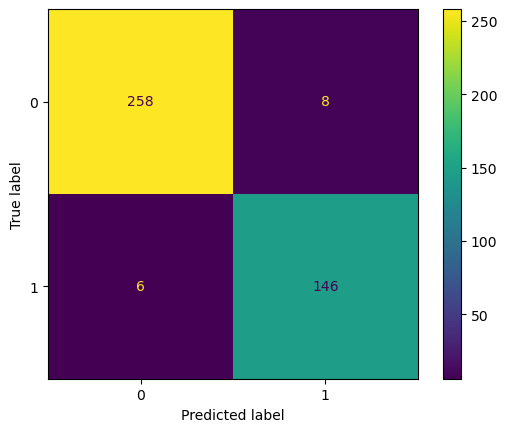

array([[258,   8],
       [  6, 146]], dtype=int64)

In [29]:
'''
숙제
1. Logistic Regression 뭔지 배워오기
2. k-nearest neighbor 뭔지 배워오기
3. Decision Tree 뭔지 배워오기
'''

# 1. Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

# 모델 생성 / train
logistic = LogisticRegression()
logistic.fit(x_train, y_train.values.ravel())

# 모델 test
y_test['Survived_Prediction_logistic'] = logistic.predict(x_test)

# 결과 확인
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_pred=y_test[['Survived_Prediction_logistic']], y_true=y_test[['Survived']])
# confusion_matrix

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=logistic.classes_)
disp.plot()
plt.show()

# 2. k-nn

# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(x_train, y_train)

# y_test['Survived_prediction_knn'] = knn.predict(x_test)

# from sklearn import metrics
# confusion_matrix = metrics.confusion_matrix(y_pred=y_test[['Survived_prediction_knn']], y_true=y_test[['Survived']])
# confusion_matrix

# 3. Decision Tree
# from sklearn.tree import DecisionTreeClassifier
# from sklearn import tree

# clf = DecisionTreeClassifier()
# clf.fit(x_train, y_train)

# y_test['Survived_Prediction_tree'] = clf.predict(x_test)

# from sklearn import metrics
# confusion_matrix = metrics.confusion_matrix(y_test[['Survived_Prediction_tree']], y_test[['Survived']])
# confusion_matrix

# tree.plot_tree(clf)

confusion_matrix


In [33]:
# y_test[['Survived', 'Survived_Prediction_logistic']]
y_test['PassengerId'] = df_test[['PassengerId']]
y_test[['PassengerId', 'Survived_Prediction_logistic']].rename(columns={'Survived_Prediction_logistic': 'Survived'}).to_csv('result.csv', index=False)

### Validation / Improvements

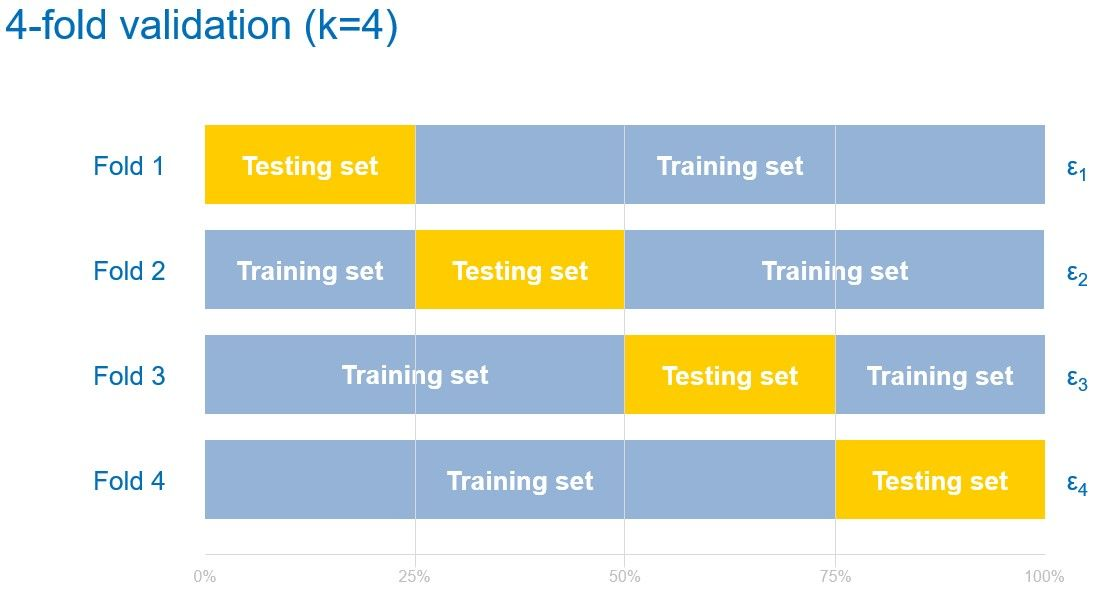

In [ ]:
from sklearn.model_selection import LeaveOneOut

,Pclass,Age,Sex_Female,Sex_Male,Fare,Family_Exist
0,1.0,0.271174,0.0,1.0,-0.507051,1
1,0.0,0.472229,1.0,0.0,0.947944,1
2,1.0,0.321438,1.0,0.0,-0.450387,0
3,0.0,0.434531,1.0,0.0,0.760475,1
4,1.0,0.434531,0.0,1.0,-0.440426,0
...,...,...,...,...,...,...
886,0.5,0.334004,0.0,1.0,-0.135343,0
887,0.0,0.233476,1.0,0.0,0.396993,0
888,1.0,0.367921,1.0,0.0,0.240185,1
889,0.0,0.321438,0.0,1.0,0.396993,0


### Improvements